In [51]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.tree import export_graphviz
from subprocess import call
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [52]:
dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3)

def create_tree_image(clf, title):
    export_graphviz(
        clf,
        out_file='tree.dot',
        feature_names=dataset.feature_names,
        class_names=dataset.target_names,
        rounded=True,
        proportion=False,
        precision=2,
        filled = True,
    )

    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display in python
    plt.figure(figsize = (9, 7))
    plt.imshow(plt.imread('tree.png'))
    plt.axis('off');
    plt.title(title)
    plt.show();

def create_dependency_graph(train_data, train_label, test_data, test_label, x_label, x1, x2, y_label, title):
  plt.figure(figsize=(10, 5))
  plt.plot(range(x1, x2), train_data, label=train_label)
  plt.plot(range(x1, x2), test_data, label=test_label)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.legend()
  plt.show()

#Пункт 1

Построить и визуализировать дерево решений.

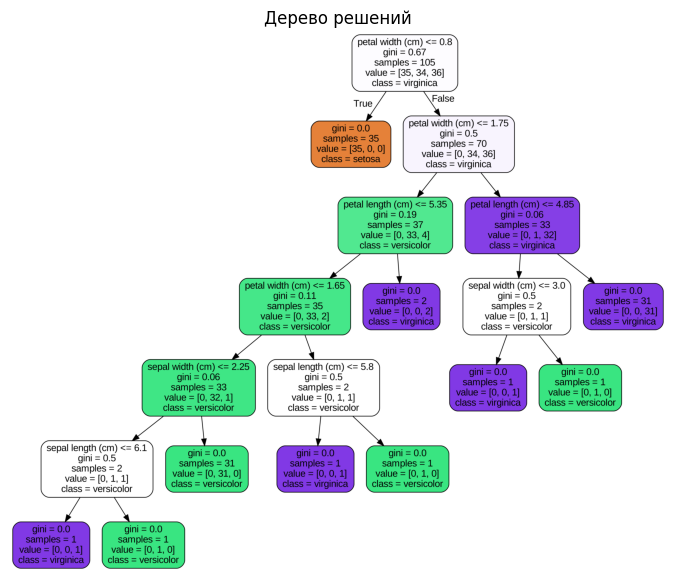

In [58]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
create_tree_image(dt, 'Дерево решений')

#Пункт 2

Применить метод градиентного бустинга. Вычислить значимость переменных. Выдать список построенных деревьев.

Значимость переменных:
sepal length (cm): 0.0019432953263030775
sepal width (cm): 4.967908853079154e-06
petal length (cm): 0.4821277472399046
petal width (cm): 0.5159239895249392
Список построенных деревьев:


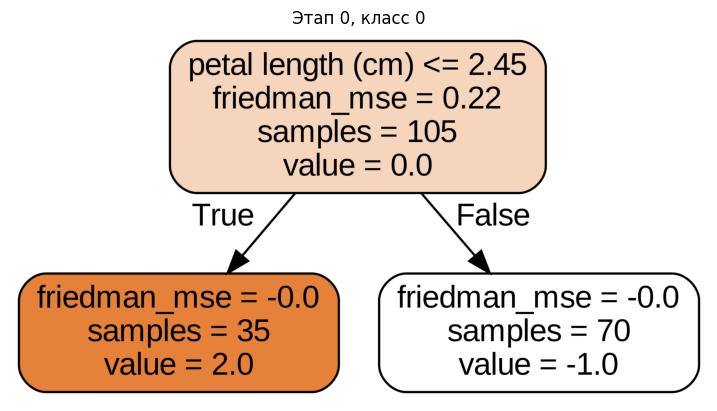

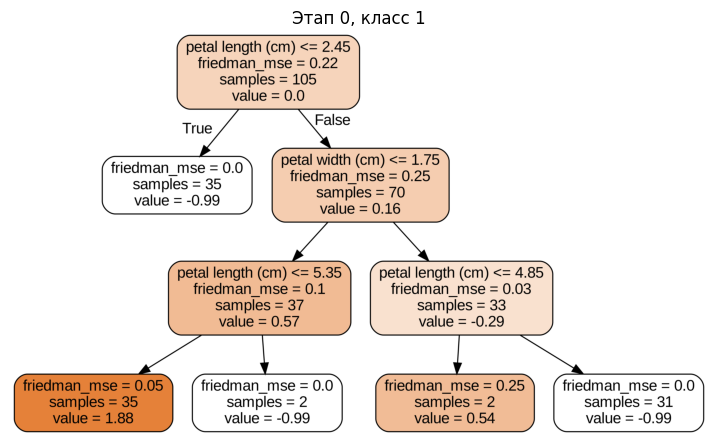

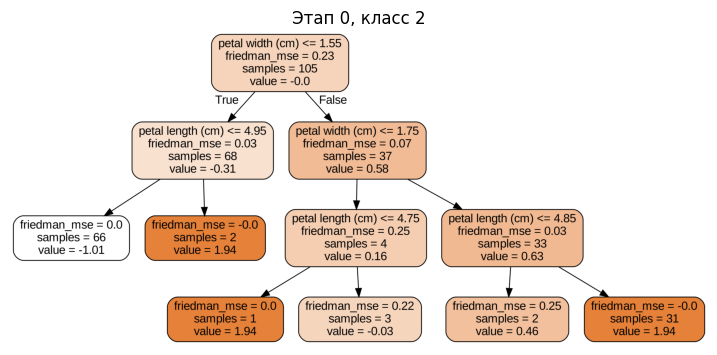

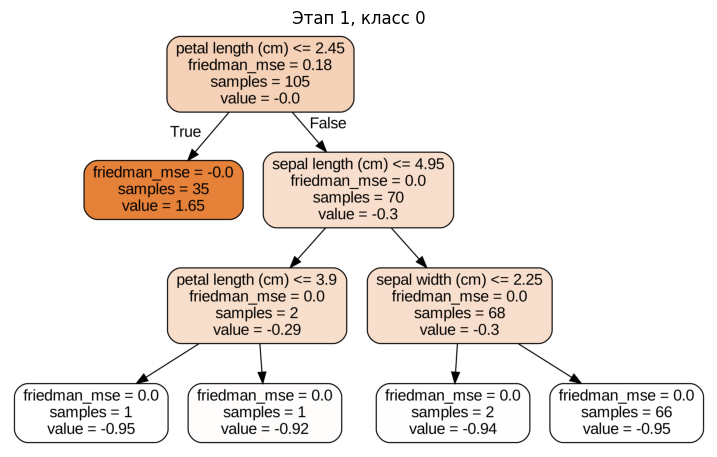

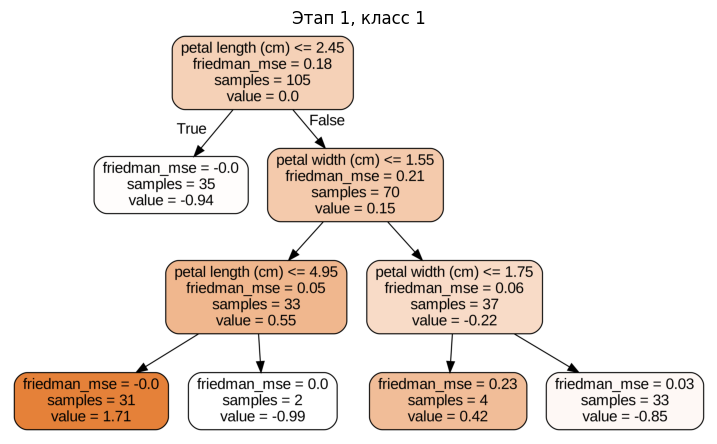

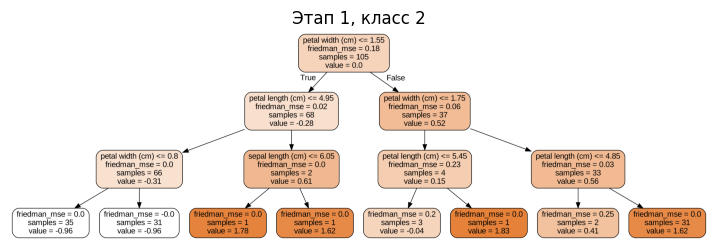

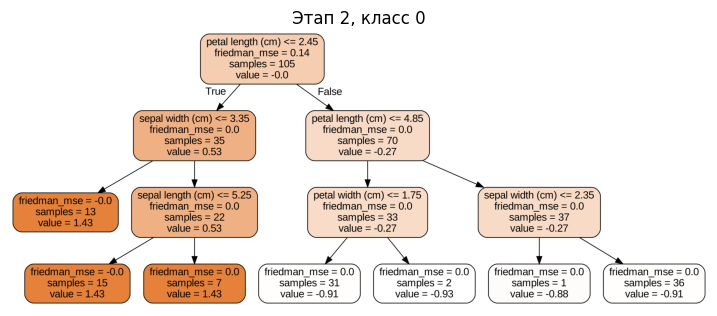

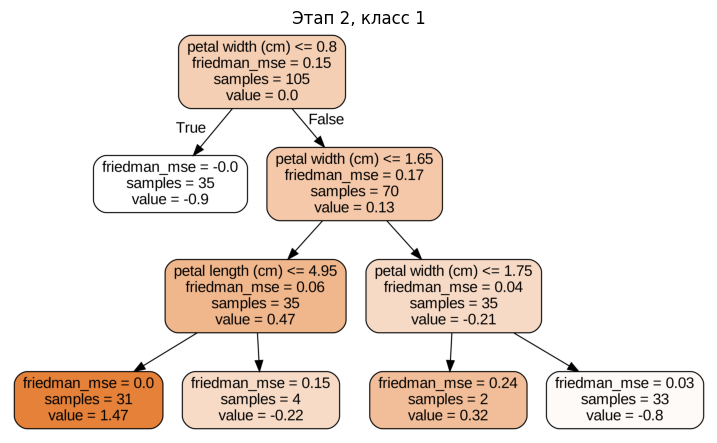

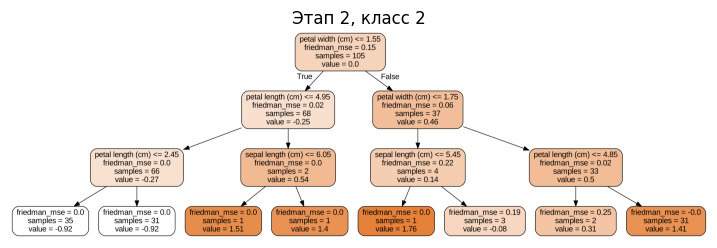

In [59]:
n_estimators = 3
gr = GradientBoostingClassifier(n_estimators=n_estimators).fit(X_train, y_train)

feature_importances = gr.feature_importances_
print("Значимость переменных:")
for feature, importance in zip(dataset.feature_names, feature_importances):
    print(f"{feature}: {importance}")

trees = gr.estimators_
print("Список построенных деревьев:")
for i in range(n_estimators):
  for class_idx in range(gr.n_classes_):
    create_tree_image(trees[i,  class_idx], f'Этап {i}, класс {class_idx}')

#Пункт 3

Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева.

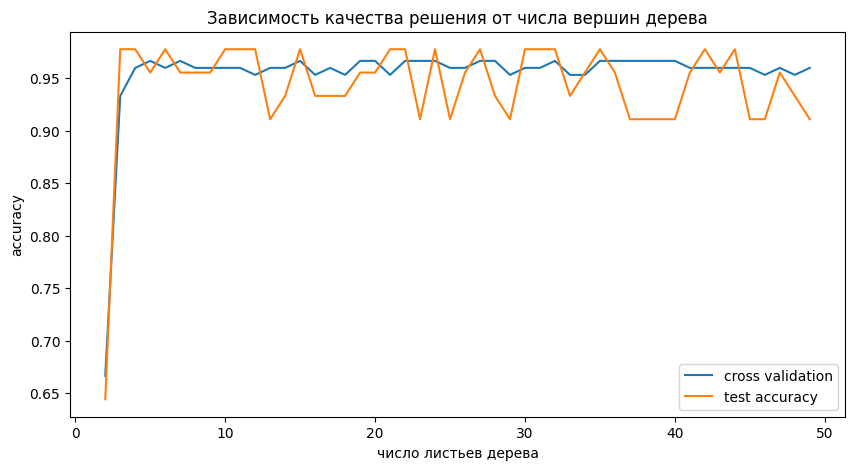

In [55]:
cross_validation = []
scores_test = []
for i in range(2, 50):
    dt = DecisionTreeClassifier(max_leaf_nodes=i)
    cross_validation.append(cross_val_score(dt, dataset.data, dataset.target, cv = 5).mean())
    dt = dt.fit(X_train, y_train)
    scores_test.append(accuracy_score(y_test, dt.predict(X_test)))
create_dependency_graph(
    cross_validation, 'cross validation',
    scores_test, 'test accuracy',
    'число листьев дерева', 2, 50,
    'accuracy',
    'Зависимость качества решения от числа вершин дерева')



#Пункт 4

Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.
Для разной глубины дерева нужно построить несколько зависимостей качества от числа деревьев, чтобы найти оптимальную комбинацию этих параметров.


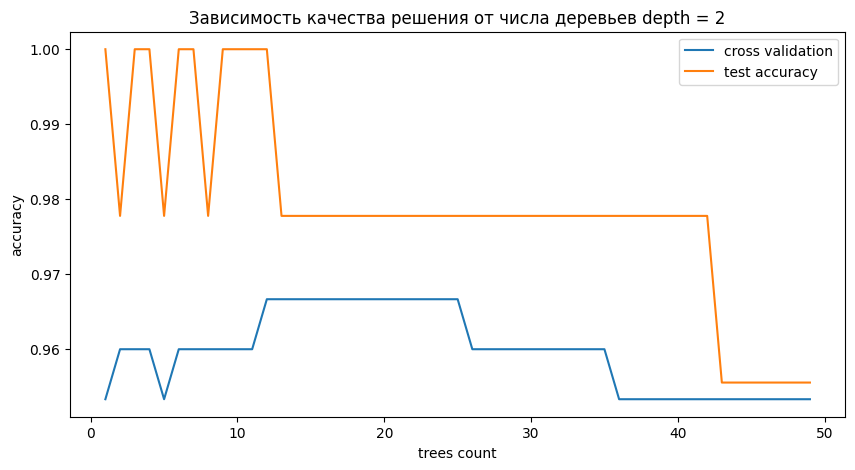

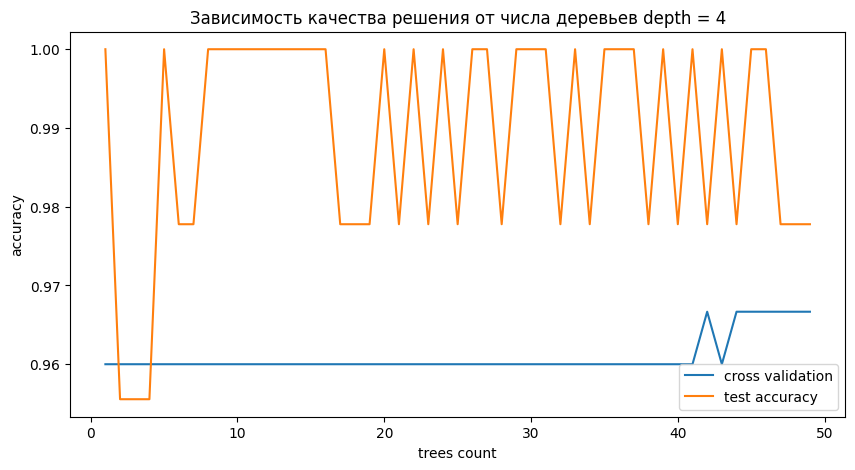

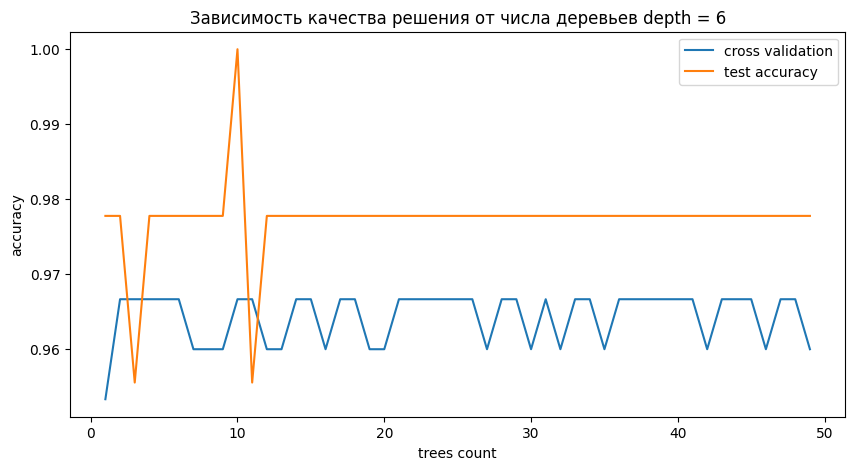

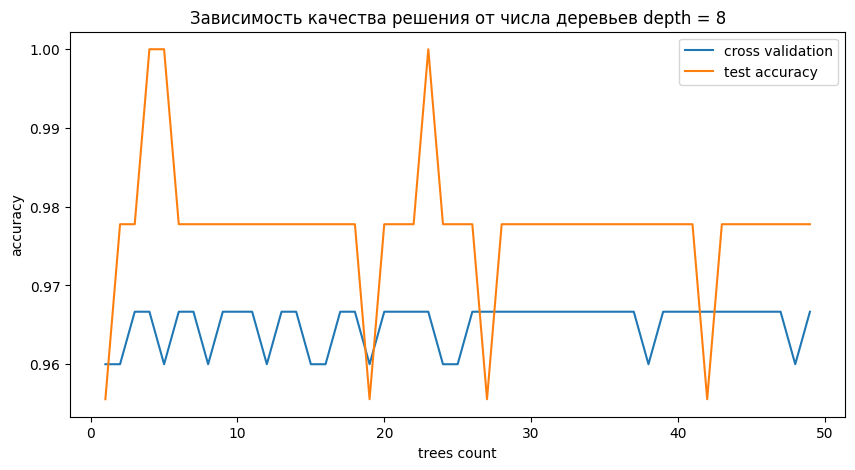

In [56]:
for depth in range(2,10,2):
  cross_validation = []
  scores_test = []
  for trees in range(1, 50):
      gb = GradientBoostingClassifier(n_estimators=trees, max_depth=depth)
      cross_validation.append(cross_val_score(gb, dataset.data, dataset.target, cv = 5).mean())
      gb.fit(X_train, y_train)
      scores_test.append(accuracy_score(y_test, gb.predict(X_test)))
  create_dependency_graph(
    cross_validation, 'cross validation',
    scores_test, 'test accuracy',
    'trees count', 1, 50,
    'accuracy',
    f'Зависимость качества решения от числа деревьев depth = {depth}')


#Пункт 5



Выполнить предыдущий пункт для случайного леса.

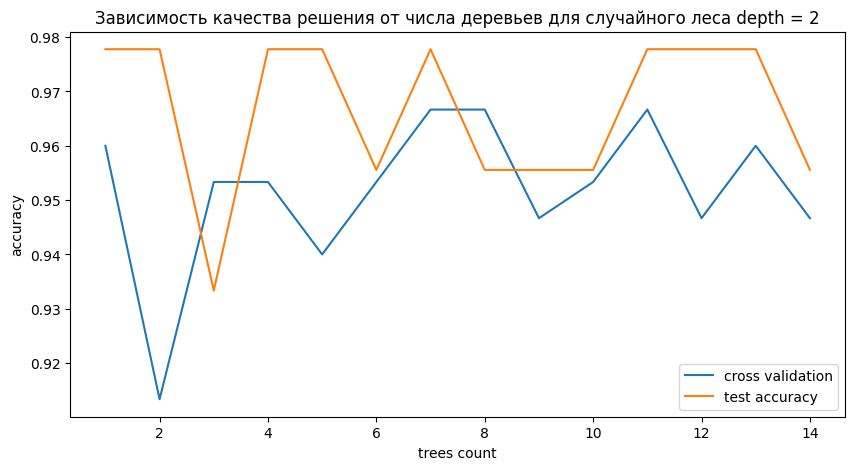

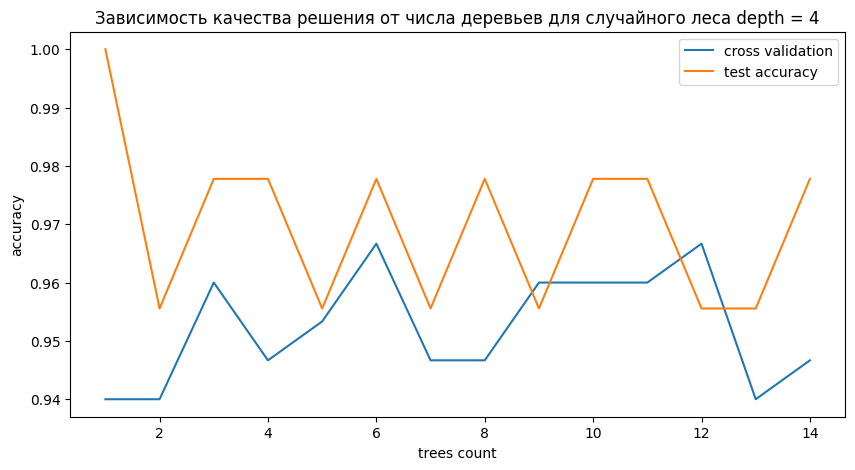

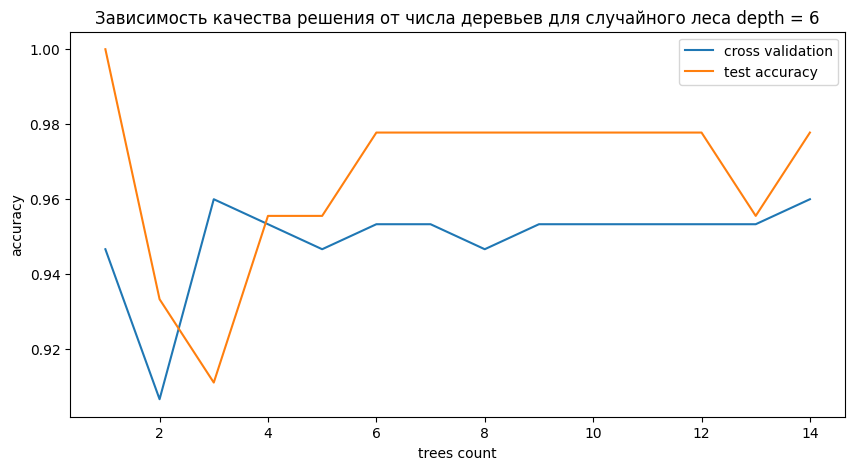

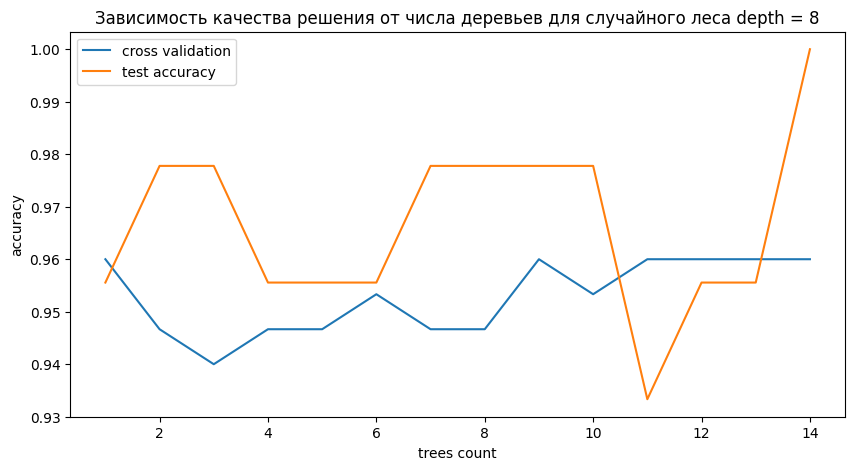

In [57]:
for depth in range(2,10,2):
  cross_validation = []
  scores_test = []
  for trees in range(1, 15):
      rf = RandomForestClassifier(n_estimators=trees)
      cross_validation.append(cross_val_score(rf, dataset.data, dataset.target, cv = 5).mean())
      rf.fit(X_train, y_train)
      scores_test.append(accuracy_score(y_test, rf.predict(X_test)))
  create_dependency_graph(
      cross_validation, 'cross validation',
      scores_test, 'test accuracy',
      'trees count', 1, 15,
      'accuracy',
      f'Зависимость качества решения от числа деревьев для случайного леса depth = {depth}')